<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Activity_Adaptive_Integration_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adaptive Numerical Integration

Last time we looked at methods for numerically estimating integrals.  In general, we can summarize these methods by the following steps:

1.  Divide the range of integration into $N$ equally spaced "slices".

2.  Use these slices to interpolate the values of the function we are trying to integrate.  For trapezoidal rule, in each slice we perform a linear interpolation.  In Simpson's rule, we perform a quadratic interpolation between two adjoining slices.  Note that there are higher order polynomials you could use: for example you can use a cubic between three adjacent slices.  Also another important note: the number of slices you use has to be evenly divisible by the order of the polynomial you are using.  For example, in Simpson's rule you have to use an even number of intervals

3.  For each polynomial we interpolated with, integrate that polynomial to get an estimate of the integral over that range, which we'll call $A_h$.

4.  Add up all of the estimates to get the total integral, that is calculate $\sum A_h$.

Examples of this are shown in the figure below for a zeroth order (constant value) polynomial (a) and a first order (linear, trapezoidal rule) polynomial (b) and (c).

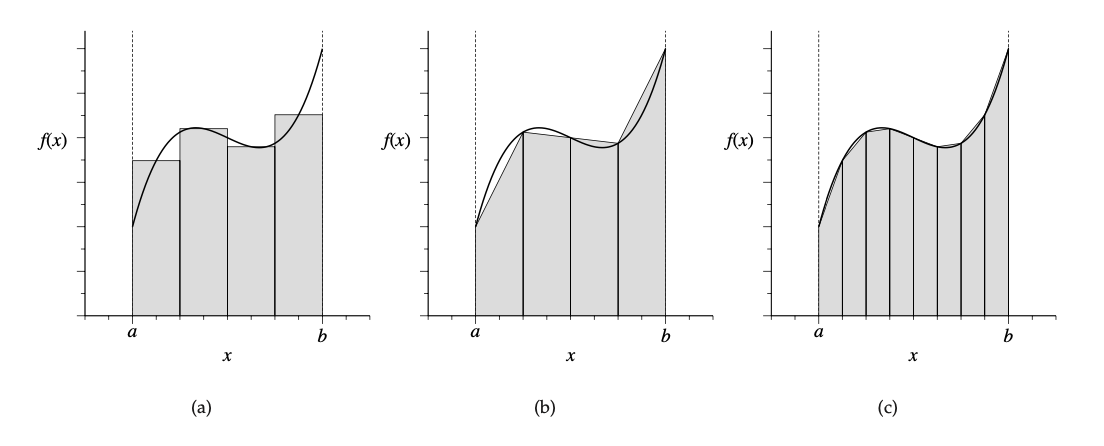

One thing we saw last time was that the accuracy of the integral will be highly dependent on the number of slices we choose.  While we could arbitrarily choose the number of slices, we'd like to have a more robust way to compute these.  If we want to calculate the accuracy of an integral to a given precision without doing extra work, we can employ "adaptive sampling" techniques to progressively calculate the integral with more and more slices until we achieve the desired level of precision.

One adaptive sampling procedure looks like this:

1.  Choose a small number of slices, which we'll call $N_1$ (for the number of slices at step 1).  Pick something small, such as  $N_1=10$.  Evaluate the integral for $N_1$ slices and save its value as $I_1$.

2.  Double the number of slices.  That is, have $N_2 = 2 \cdot N_1$.  Again, calculate the integral and save it as $I_2$.

3.  Calculate the error in the $i=2$ integral using the formula:

>$\epsilon_i = \frac{1}{3}\left.|I_i-I_{i-1}\right.|$ 

> for the trapezoidal rule and 

>$\epsilon_i = \frac{1}{15}\left.|I_i-I_{i-1}\right.|$ 

>for Simpson's rule (see below for where these equations come from).  

4. If the error at the $i=2$ step is small enough (that is, below a specified tolerance), then you're done!  If not, perform another iteration ($i=3) where you again double the number of slices, calculate the error, and check if its below your tolerance.  Keep repeating this procedure until your error estimate is below the chosen tolerance (or once you've run for a really long time, in which case your tolerance may be too small).

##Aside: Error estimates between iterations

To determine the error of the integral in iteration $i$ ($I_i$), note that the error is quadratically related to the size of the slice spacing $h$.  That is, if the exact integral value is $I$, we can write:

$I = I_i + c h_i^2$

where $c$ is some constant.  

If we want to know the error, $\epsilon_i$, that can be written as:

$\epsilon_i = I - I_i = c h_i^2$

This isn't the most useful though, since we don't know $c$.  We can clean it up by doing the same thing for iteration $i-1$:

$I = I_{i-1} + c h_{i-1}^2$

If we subtract the two we get:

$I_{i}-I_{i-1}= c h_{i-1}^2-c h_{i}^2= 3$c h_i^2$

Where in the last step we used:

$h_{i-1} = 2 h_i$

This gives us a way to solver for $c$.  When we do that and plug it into our error estimate, we get:

$\epsilon_i = I - I_i = \frac{1}{3} \left(I_{i}-I_{i-1}\right)$

Note that we can do something similar for Simpson's rule (we won't here).  And for that we get:


$\epsilon_i = I - I_i = \frac{1}{15} \left(I_{i}-I_{i-1}\right)$





## Activity

Look at the code you wrote last class for implementing the trapezoidal rule.  Use it as the basis for code that implements an adaptive sampling of the trapezoidal rule.  Use it to calculate the integral of the function:

$
f\left(x\right) = x^5 + 3\cdot x^3 + 2
$

for $1\leq x \leq  5$ with an accuracy of $10^{-6}$.  To do that, put the trapezoidal rule code into a loop, and run that loop with progressively larger values of $N$ in each iteration.  Like above, double the number of slices each iteration.  Use the results of iterations $i$ and $i-1$ to estimate the error for iteration $i$, and run until this error is less than the requested accuracy.  

When you are done, plot on a log-log plot the number of slices (x-axis) and the error.  How many slices do you need to get the requested accuracy?


In [1]:
import numpy as np
import matplotlib.pyplot as plt

User defined variables for the start and end of the integration bounds, along with the specified tolerance and number of slices in iteration 1.

In [2]:
a = 1.0
b = 5.0
tolerance = 1.0e-6
N_init = 10

Function to be calculated

In [3]:
def f(x):
  return x**5.0 + 3.0*x**3.0 +2.0

In [4]:
I = np.array([0.0]) #Array of integral estimates.  Set the 0th estimate to 0
N = [N_init/2] # Array of slices.  Set the 0th estimate to N_init/2 so that it gets doubled to N_init on first round

tol = [10*tolerance] #tolerance array.  The 0th value doesn't matter as long as its greater than the required tolerance
i = 0 #iteration number
while tol[i]>tolerance:  #run for as long as the tolerance in an iteration is greater than the tolerance required
  i += 1  #update the iteration number
  N.append(int(N[i-1]*2)) #Append to your N array the number of slices for this iteration, being twice what you have in the previous iteration
  h=(b-a) / N[i]  #find the spacing
  x = np.linspace(a,b,N[i]+1,endpoint=True) #Note the N+1 is because for N trapezoids, you need N+1 points
  y = f(x) #y values for x points
  int_estimate = h*0.5*(y[0]+y[-1]) #The next few lines calculate the integral using the trapazoidal rule
  for j in range(1,N[i]):
    int_estimate += h * y[j]
  I=np.append(I,int_estimate) #Append to the array of integral estimates the value found for the ith iteration
  tol.append(1.0/3.0*np.abs(I[i]-I[i-1])) #Append to the tolerance array the value found for the ith iteration

To achience an accuracy of 1e-06  N =  81920 slices are required.  The final integral value is:  3080.000000662784


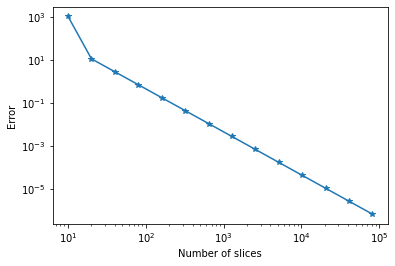

In [5]:
print("To achience an accuracy of",tolerance, " N = ",N[i], "slices are required.  The final integral value is: ",I[i])
plt.loglog(N[1:],tol[1:],'*-') #plot the results
plt.xlabel("Number of slices")
plt.ylabel("Error")
plt.show()

While repeating the trapezoidal integration at each iteration will work, its not highly efficient.  So see why, consider the figure below.  On the top line are the x-axis values for where you need to sample your function if you have $N=4$ slices, along with their weights in the trapezoidal rule.  On the second row is the same thing, but for $N=8$ slices.  Note that many of the values are the same! In fact, to go from $N=4$ to $N=8$ slices, we only need to consider four new datapoints, which are the points being pointed to by arrows.  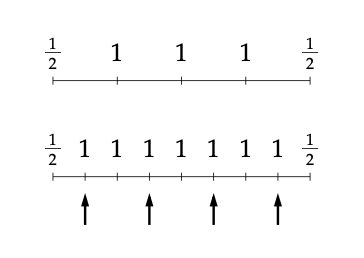



We'd like to design an algorithm that takes advantage of this observation to be more efficient.  To do that, lets look at the trapezoidal rule for calculating the integral at the steps $i-1$ and $i$:

$I_{i-1} = h_{i-1} \left[\frac{1}{2}f\left(a\right) + \frac{1}{2}f\left(b\right) + \sum_{k=1}^{N_{i-1}-1}f\left(a + k \cdot h_{i-1}\right)  \right]$

$I_{i} = h_{i} \left[\frac{1}{2}f\left(a\right) + \frac{1}{2}f\left(b\right) + \sum_{k=1}^{N_{i}-1}f\left(a + k \cdot h_{i}\right)  \right]$


There are a lot of things in common between these two equations.  The biggest differences are the spacing terms $h$, and the number of terms in the summation, with the summation in $I_i $ having twice as many terms as in $I_{i-1}$.  

We can make $I_{i}$ look more like $I_{i-1}$ if we split the summation up into two terms, one over the odd values of $k$ and one over the even values:

$I_{i} = h_{i} \left[\frac{1}{2}f\left(a\right) + \frac{1}{2}f\left(b\right) + \sum_{k=1,3,5... (odd)}^{N_{i}-1}f\left(a + k \cdot h_{i}\right) + \sum_{k=2,4,6... (even)}^{N_{i}-2}f\left(a + k \cdot h_{i}\right)   \right]$

Remember that  the spacing in iteration $i$ is half that as in iteration $i-1$, and that the number of splices in iteration $i$ is twice that in iteration $i-1$.  That is:

$h_{i-1} = 2 h_i$

and 

$2 N_{i-1} = N_i$

Using this, we can rewrite the summation over even terms to be:

$\sum_{k=2,4,6... (even)}^{N_{i}-2}f\left(a + k \cdot h_{i}\right) = \sum_{k=1}^{N_{i}/2-1}f\left(a + 2k \cdot h_{i}\right) = \sum_{k=1}^{N_{i-1}-1}f\left(a + k \cdot h_{i-1}\right)$

Note that this is exactly the summation in the $I_{i-1}$ integral. This lets us rewrite $I_{i}$ as:

$I_{i} = \frac{1}{2}h_{i-1} \left[\frac{1}{2}f\left(a\right) + \frac{1}{2}f\left(b\right) + \sum_{k=1}^{N_{i-1}-1}f\left(a + k \cdot h_{i-1}\right) + 2 \sum_{k=1,3,5... (odd)}^{N_{i}-1}f\left(a + k \cdot h_{i}\right)   \right]$

Noting that the first three terms are nothing but one half the integral $I_{i-1}$, we get:

$I_{i} = \frac{1}{2} I_{i-1}  + h_i \sum_{k=1,3,5... (odd)}^{N_{i}-1}f\left(a + k \cdot h_{i}\right)  $

What this says is that if we want to create a new estimate for our integral at step $i$, we can take the old estimate from step $i-1$ and just add to it the new points we're considering.  This means that if we are going from an iteration with 1000 slices to one with 2000 slices, we only need to calculate values for the 1000 new $f\left(x\right)$ values we have to consider.

## Activity

Repeat the above activity, but this time write code that calculates the integral at step $i$ from the integral at step $i-1$.  Note that for the first iteration you'll need to run the full trapezoidal integration.  

In [6]:
import numpy as np
import matplotlib.pyplot as plt

User defined variables for the start and end of the integration bounds, along with the specified tolerance and number of slices in iteration 1.

In [7]:
a = 1.0
b = 5.0
tolerance = 1.0e-6
N_init = 10

Function to be calculated

In [8]:
def f(x):
  return x**5.0 + 3.0*x**3.0 +2.0

In [9]:
I = np.array([0.0])
N = [N_init/2]

tol = [1.0]
i = 0
while tol[i]>tolerance:
  i += 1
  N.append(int(N[i-1]*2))
  h=(b-a) / N[i] 
  x = np.linspace(a,b,N[i]+1,endpoint=True) #Note the N+1 is because for N trapezoids, you need N+1 points
  y = f(x)
  if i==1: #Note that for the first iteration we have to do the full trapezoidal rule, but after that we can use the results of the previous iteration
    int_estimate = h*0.5*(y[0]+y[-1])
    for j in range(1,N[i]):
      int_estimate += h * y[j]
  else:
    int_estimate = I[i-1] *0.5
    for j in range(1,N[i],2):
      int_estimate += h * y[j]
  I=np.append(I,int_estimate)
  tol.append(1.0/3.0*np.abs(I[i]-I[i-1]))

To achience an accuracy of 1e-06  N =  81920 slices are required.  The final integral value is:  3080.0000006627765


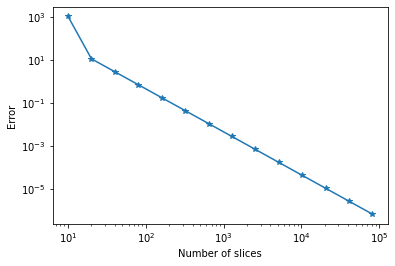

In [10]:
print("To achience an accuracy of",tolerance, " N = ",N[i], "slices are required.  The final integral value is: ",I[i])
plt.loglog(N[1:],tol[1:],'*-')
plt.xlabel("Number of slices")
plt.ylabel("Error")
plt.show()

## Adaptive Simpson's Rule

So far we have focused on adaptive routines using the trapezoidal rule.  In your homework you will write a similar routine, but this time using Simpson's rule.  Like in our first example, you could do this by rerunning the full integration at each step, using the calculations at step $i-1$ to inform the calculation at step $i$.  Without deriving it, here are the steps:

1.  At iteration 1, calculate two sums, $S_1$ and $T_1$, which are defined by:

>$S_1 = \frac{1}{3}\left[f\left(a\right) + f\left(b\right) + 2 \sum_{k=2,4,6,...}^{N_1-2} f\left(a+k h_1\right)\right]$

>$T_1 = \frac{2}{3} \sum_{k=1,3,5,...}^{N_1-1} f\left(a+k h_1\right)$

>Use these to calculate the integral:

>$I_1 = h_1 \left(S_1 + 2 T_1\right) $

2.  Double the number of steps.  Then in iteration 2 and beyond, calculate the term $T_i$ as:

>$T_i = \frac{2}{3} \sum_{k=1,3,5,...}^{N_i-1} f\left(a+k h_i\right)$

>and the term $S_i$ as:

> $S_i = S_{i-1} + T_{i-1}$

> Use these new $S_i$ and $T_i$ terms to calculate the integral $I_i$.  Like with our adaptive trapezoidal rule above, this saves us a lot of calculations, as we only need to calculate the $T_i$ terms fresh each new iteration.



## Activity (if you have time)

Repeat the first activity above, but this time use Simpson's rule.  Don't forget to use the error estimate:

$\epsilon_i = \frac{1}{15}\left(I_i-I_{i-1}\right)$

How do your results compare to what you found in the first activity?

If you have even more time, try to implement the recursive iterative Simpson's rule outlined above.